In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from toolz import get_in, assoc, partial, dissoc, first, take, merge
import pprint

from image_pipeline.google_api_funcs.functions import ident_crop_hints, ident_dominant_colors, ident_landmarks
from image_pipeline import example_data
from image_pipeline.utils.image_utils import show_images, prep_for_matplotlib
from image_pipeline.utils.pipeline_utils import map_merge

# Load test dataset

In [7]:
DATA = example_data.get_test_images()
DATA.head(3).T

image__url test dataset: /Users/wmcabee/PycharmProjects/image_pipeline/src/image_pipeline/example_data/test_images.csv


,0,1,2
image_url,https://www.kids-world-travel-guide.com/images...,https://www.kids-world-travel-guide.com/images...,https://www.kids-world-travel-guide.com/images...
comment,Eiffel Tower,Great Wall,Red Square


# Identify dominant colors

In [8]:
image_url = DATA.iloc[0].image_url
ident_dominant_colors(image_url=image_url, limit=3)

{'colors': [{'color': {'red': 127, 'green': 164, 'blue': 227},
   'score': 0.15442963,
   'pixelFraction': 0.0842576},
  {'color': {'red': 93, 'green': 156, 'blue': 235},
   'score': 0.09807762,
   'pixelFraction': 0.079159215},
  {'color': {'red': 171, 'green': 109, 'blue': 26},
   'score': 0.08729775,
   'pixelFraction': 0.006529517}]}

In [9]:
reader = DATA.to_dict(orient='records')
reader = map_merge(func=ident_dominant_colors, func_args=['image_url'], func_params={'limit': 1}, reader=reader)
COLORS = list(reader)
pprint.pprint(COLORS)

[{'colors': [{'color': {'blue': 227, 'green': 164, 'red': 127},
              'pixelFraction': 0.0842576,
              'score': 0.15442963}],
  'comment': 'Eiffel Tower',
  'image_url': 'https://www.kids-world-travel-guide.com/images/xparis_eiffeltower_ssk500.jpeg.pagespeed.ic.2lwZPZtnJ8.jpg'},
 {'colors': [{'color': {'blue': 151, 'green': 124, 'red': 88},
              'pixelFraction': 0.079045095,
              'score': 0.20425606}],
  'comment': 'Great Wall',
  'image_url': 'https://www.kids-world-travel-guide.com/images/xchina_wall_ssk500.jpeg.pagespeed.ic.g_9Qpc2Tzf.jpg'},
 {'colors': [{'color': {'blue': 198, 'green': 191, 'red': 226},
              'pixelFraction': 0.20141467,
              'score': 0.45766097}],
  'comment': 'Red Square',
  'image_url': 'https://www.kids-world-travel-guide.com/images/xbasilscathedral_FelipeFrazao_ssk-2.jpg.pagespeed.ic.dl_pQr7qVV.jpg'},
 {'colors': [{'color': {'blue': 161, 'green': 67, 'red': 2},
              'pixelFraction': 0.1498211,
      

# Identify crop hints

In [10]:
image = COLORS[0]
ident_crop_hints(image_url=image['image_url'], aspect_ratios= 1)

{'bounding_box': [{'x': 79, 'y': 0},
  {'x': 414, 'y': 0},
  {'x': 414, 'y': 329},
  {'x': 79, 'y': 329}],
 'confidence': 0.79999995,
 'importance_fraction': 0.76}

In [24]:
reader = COLORS
reader = map_merge(func=ident_crop_hints, func_args=['image_url'], func_params={'aspect_ratios': 2/3}, reader=reader)
BOUNDED = list(reader)
pprint.pprint(dissoc(BOUNDED[0],'_im'))

{'bounding_box': [{'x': 189, 'y': 0},
                  {'x': 414, 'y': 0},
                  {'x': 414, 'y': 329},
                  {'x': 189, 'y': 329}],
 'colors': [{'color': {'blue': 227, 'green': 164, 'red': 127},
             'pixelFraction': 0.0842576,
             'score': 0.15442963}],
 'comment': 'Eiffel Tower',
 'confidence': 0.79999995,
 'image_url': 'https://www.kids-world-travel-guide.com/images/xparis_eiffeltower_ssk500.jpeg.pagespeed.ic.2lwZPZtnJ8.jpg',
 'importance_fraction': 0.56}


# Display results

>> fetching image https://www.kids-world-travel-guide.com/images/xparis_eiffeltower_ssk500.jpeg.pagespeed.ic.2lwZPZtnJ8.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xchina_wall_ssk500.jpeg.pagespeed.ic.g_9Qpc2Tzf.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xbasilscathedral_FelipeFrazao_ssk-2.jpg.pagespeed.ic.dl_pQr7qVV.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xital_pisa_500.jpg.pagespeed.ic.tOXMILMJS7.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xpyramids_giza_500.jpeg.pagespeed.ic.L6HuuLoR_9.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xsydney_tooykrub_ssk500.jpg.pagespeed.ic.PQaIYJhh9A.jpg
>> fetching image https://www.kids-world-travel-guide.com/images/xtajmahal_500.jpg.pagespeed.ic.V6ys_qmH8t.jpg


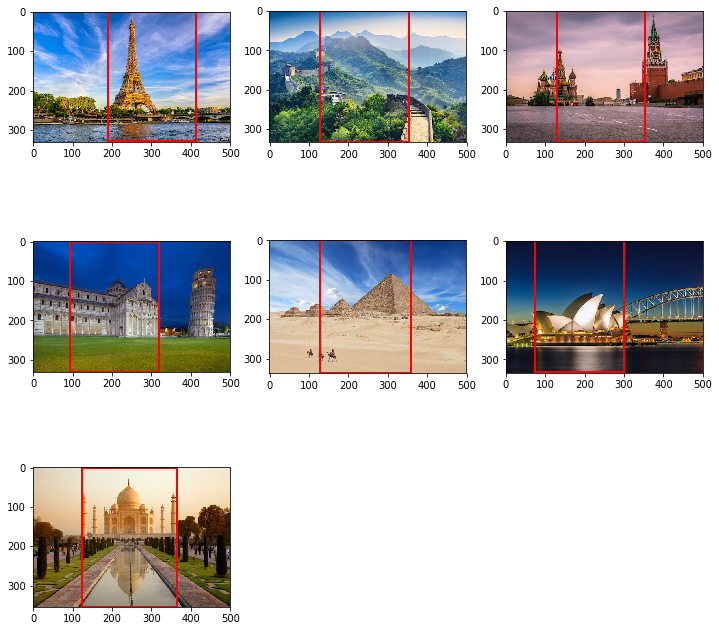

In [21]:
show_images(image_list=BOUNDED)

In [22]:
image_url = DATA.iloc[0].image_url
ident_landmarks(image_url)

{'landmarks': [{'description': 'Eiffel Tower',
   'score': 0.37533063,
   'bounding_box': [{'x': 230, 'y': 159},
    {'x': 288, 'y': 159},
    {'x': 288, 'y': 225},
    {'x': 230, 'y': 225}],
   'location': {'latitude': 48.858461, 'longitude': 2.294351}}]}

In [27]:
reader = BOUNDED
reader = map_merge(func=ident_landmarks, func_args=['image_url'], reader=reader)
LANDMARKS = list(reader)
#pprint.pprint(LANDMARKS[0])

In [28]:
LANDMARKS

[{'landmarks': [{'description': 'Eiffel Tower',
    'score': 0.37533063,
    'bounding_box': [{'x': 230, 'y': 159},
     {'x': 288, 'y': 159},
     {'x': 288, 'y': 225},
     {'x': 230, 'y': 225}],
    'location': {'latitude': 48.858461, 'longitude': 2.294351}}],
  'bounding_box': [{'x': 189, 'y': 0},
   {'x': 414, 'y': 0},
   {'x': 414, 'y': 329},
   {'x': 189, 'y': 329}],
  'confidence': 0.79999995,
  'importance_fraction': 0.56,
  'colors': [{'color': {'red': 127, 'green': 164, 'blue': 227},
    'score': 0.15442963,
    'pixelFraction': 0.0842576}],
  'image_url': 'https://www.kids-world-travel-guide.com/images/xparis_eiffeltower_ssk500.jpeg.pagespeed.ic.2lwZPZtnJ8.jpg',
  'comment': 'Eiffel Tower'},
 {'landmarks': [],
  'bounding_box': [{'x': 129, 'y': 0},
   {'x': 354, 'y': 0},
   {'x': 354, 'y': 333},
   {'x': 129, 'y': 333}],
  'confidence': 0.79999995,
  'importance_fraction': 0.51,
  'colors': [{'color': {'red': 88, 'green': 124, 'blue': 151},
    'score': 0.20425606,
    'pix